## Approach to solve the problem:
Predicting a player’s rank using the information provided in the dataset:

1. Exploratory Data Analysis (EDA): <br>
Perform an initial exploration of the dataset to understand its structure, features, and relationships. This step helps in gaining insights and identifying any data quality issues or missing values. Some tasks to perform during EDA include: <br>
a. Identify missing values using the isnull() function. <br>
b. Generate descriptive statistics using the describe() function. <br>
c. Visualize the distribution of target variable and features using plots (histograms, box plots, etc.) from libraries like matplotlib and seaborn. <br>


2. Data Preprocessing: <br>
a. Handle missing values: Depending on the extent of missing data, you can choose to drop rows or columns with missing values or impute them using techniques like mean, median, or mode. <br>
b. Encode categorical variables: If there are categorical variables in the dataset, encode them using techniques like one-hot encoding or label encoding, depending on the nature of the variables. <br>
c. Split the data: Divide the dataset into training and testing sets. <br>


3. Feature Selection or Engineering: <br>
Based on the insights gained during EDA, you might need to perform feature selection or engineering to improve the model's performance. This can involve removing irrelevant or highly correlated features, creating new features, or transforming existing ones.


4. Model Training and Evaluation: <br>
a. Experiment with different machine learning algorithms for classification like logistic regression, decision trees, random forest, or support vector machines, since predicting rank is a classification problem. <br>
b. Train the model using the training data. <br>
c. Evaluate the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, and F1 score. Use the testing data for evaluation. <br>


5. Model Improvement and Tuning:
If the model's performance is not satisfactory, you can try different algorithms or tune hyperparameters to improve it. This can be done using techniques like grid search or random search.


6. Model Deployment and Communication:
Once you have a satisfactory model, you can deploy it to make predictions on new data.
Document your findings, methodology, and evaluation results in a clear and concise manner, suitable for non-technical stakeholders.
Communicate the findings to stakeholders using visualizations and explanations that are easily understandable.


## Hypothetical: 
If stakeholders want to collect more data, you can advise them based on your EDA and model results:

1. Identify the areas where the dataset is lacking or where more data could be beneficial. For example, if certain features have a high correlation with the target variable but are limited in the current dataset, suggest collecting more data for those features.
2. Assess if there are any class imbalances or biases in the data and suggest collecting more data to address these issues.
3. Analyze if certain subsets of the data are underrepresented and recommend collecting more data to balance the representation.
4. Consider any specific insights or patterns observed during the model building process and suggest collecting more data to validate or refine those findings.
5. By providing guidance on data collection based on your EDA and model results, you can help stakeholders improve the model's accuracy and robustness.

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('data/starcraft_player_data.csv')
data.shape

(3395, 20)

## Exploratory Data Analysis

In [3]:
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [4]:
data.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


## Impute missing values

In [5]:
# There are some question marks in the data. Literally!
# All the players with LeagueIndex=8 don't have Age, HrsPerWk and TotalHrs
data[data['Age']=='?']

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,?,?,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,?,?,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,?,?,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000
3348,10022,8,?,?,?,210.5088,0.007974,0.000867,7,0.000548,0.000638,0.006518,15.7856,30.7156,4.8058,34,0.000817,6,0.000000,0.000000
3349,10023,8,?,?,?,248.0118,0.014722,0.001752,7,0.000375,0.000110,0.004115,17.4656,34.2357,7.8973,20,0.001111,8,0.000000,0.000000


In [6]:
data = data[data['Age']!='?']

In [7]:
# some of the columns have '?' instead of missing values
data.replace('?', np.nan, inplace=True)

In [8]:
# data types of the dataframe
data.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [9]:
# missing data
data.isna().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            1
TotalHours              2
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

Missing values in age, hrs per week and total hours cols - need to imputate them!

In [10]:
data['Age'].astype(float).describe()

count    3340.000000
mean       21.647904
std         4.206341
min        16.000000
25%        19.000000
50%        21.000000
75%        24.000000
max        44.000000
Name: Age, dtype: float64

In [11]:
# imputing the age column using mean value since age is normally distributed
data['Age'].fillna(data['Age'].astype(float).mean(), inplace=True)
data['Age'] = data['Age'].astype(float)

In [12]:
data['HoursPerWeek'].astype(float).describe()

count    3339.000000
mean       15.910752
std        11.962912
min         0.000000
25%         8.000000
50%        12.000000
75%        20.000000
max       168.000000
Name: HoursPerWeek, dtype: float64

In [13]:
# imputing the hrs per week column using median since it has outliers, and median is less sensitive to outliers
data['HoursPerWeek'].fillna(data['HoursPerWeek'].median(), inplace=True)
data['HoursPerWeek'] = data['HoursPerWeek'].astype(int)

In [14]:
data['TotalHours'].astype(float).describe()

count       3338.000000
mean         960.421809
std        17318.133922
min            3.000000
25%          300.000000
50%          500.000000
75%          800.000000
max      1000000.000000
Name: TotalHours, dtype: float64

In [15]:
# imputing the total hrs column using median since it has some massive outliers
data['TotalHours'].fillna(data['TotalHours'].median(), inplace=True)
data['TotalHours'] = data['TotalHours'].astype(int)

In [16]:
# Identifying the unique number of values in the dataset
data.nunique()

GameID                  3340
LeagueIndex                7
Age                       28
HoursPerWeek              32
TotalHours               237
APM                     3319
SelectByHotkeys         3320
AssignToHotkeys         3306
UniqueHotkeys             11
MinimapAttacks          2420
MinimapRightClicks      3250
NumberOfPACs            3331
GapBetweenPACs          3303
ActionLatency           3312
ActionsInPAC            3172
TotalMapExplored          52
WorkersMade             3203
UniqueUnitsMade           12
ComplexUnitsMade        1098
ComplexAbilitiesUsed    1803
dtype: int64

In [17]:
# GameID is just an index column, so dropping it
data.drop(['GameID'], axis=1, inplace=True)

## Data Visualizations

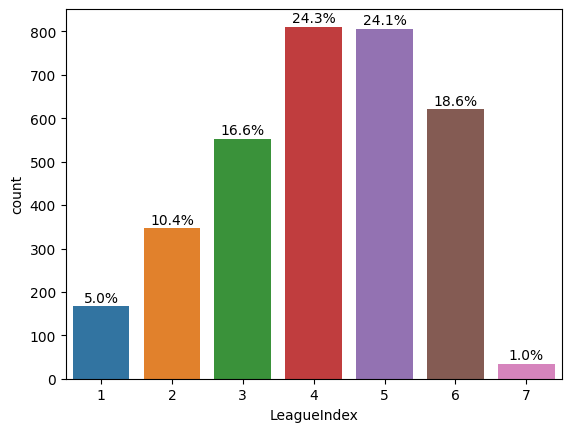

In [18]:
# distribution of the target variable to check if it is skewed or balanced
ax = sns.countplot(x='LeagueIndex', data=data)
for i, patch in enumerate(ax.patches):
    percentage = 100 * patch.get_height()/len(data)
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()+10
    ax.annotate('{:.1f}%'.format(percentage), (x, y), ha='center')
plt.show()

Target variable is almost normally distributed. This is not good - the ideal distribution should be uniform. We will address this later when training the model using SMOTE for fix the skewness of the target variable.

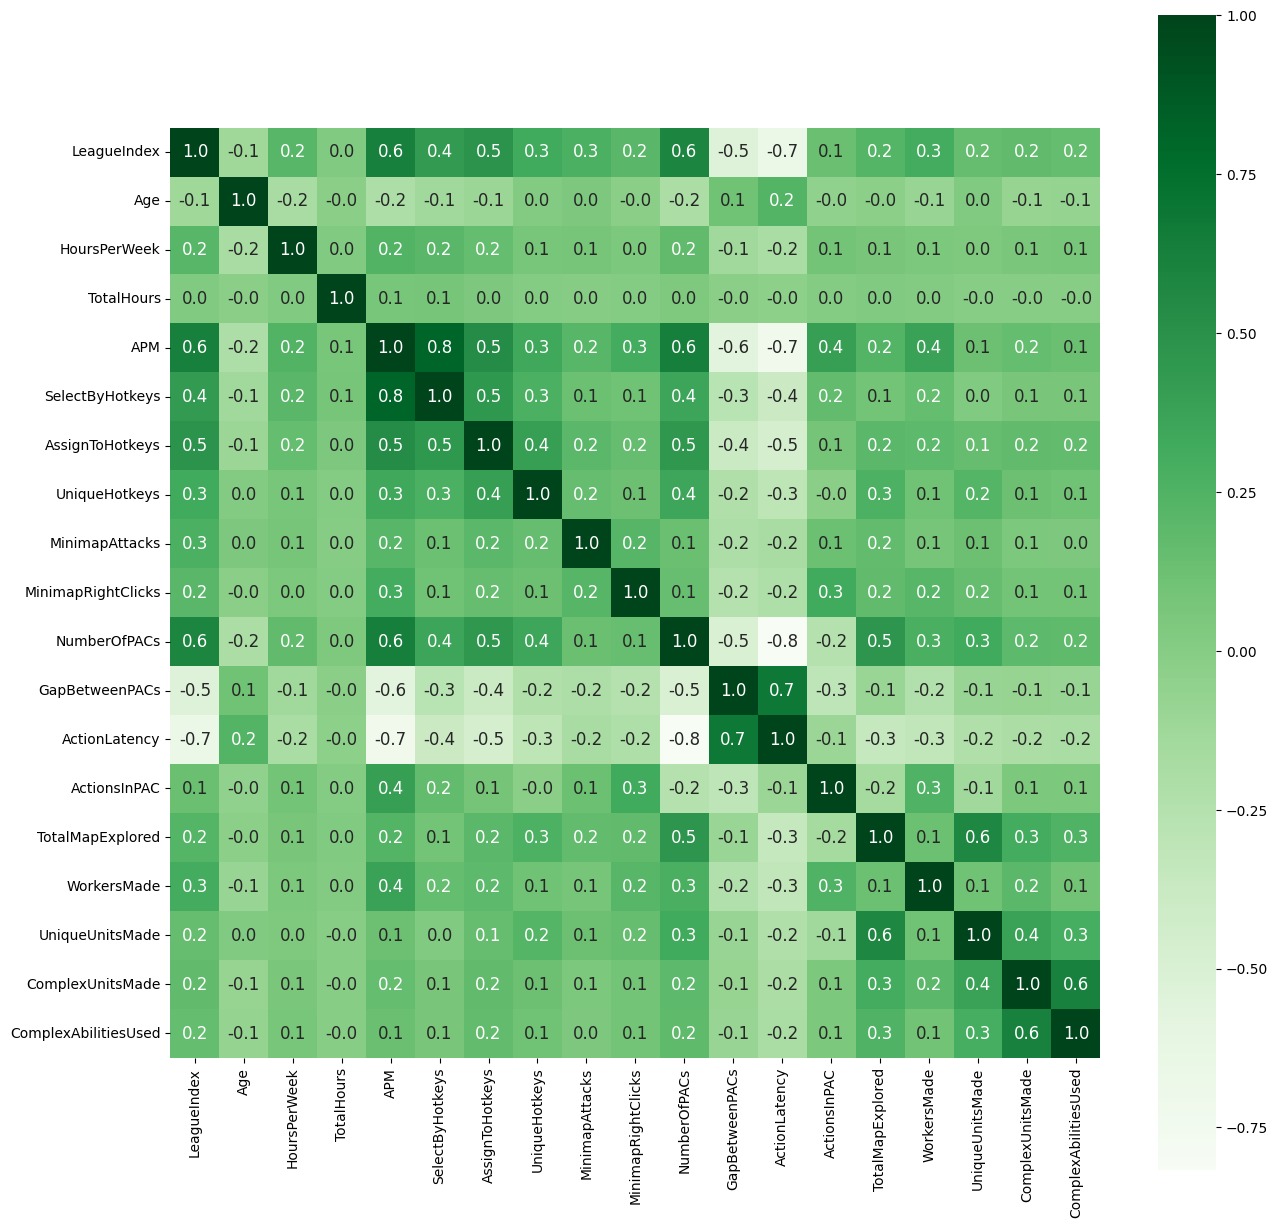

In [19]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Greens')
plt.show()

The heatmap of the correlation plot provides a visual representation of the correlation between pairs of variables in a dataset, and allows us to identify relationships, dependencies, and patterns among the variables.

1. Correlation Strength: The heatmap color-codes the correlation coefficients, making it easy to identify the strength and direction of the relationships. High positive correlations are represented by brighter colors (e.g., dark green), indicating that the variables move together. Negative correlations are represented by darker colors (e.g., white), suggesting an inverse relationship.

2. Feature Selection: The heatmap helps in feature selection by identifying highly correlated variables. If two variables are strongly correlated (either positively or negatively), it indicates that they carry similar information. In such cases, you may choose to remove one of the variables to avoid multicollinearity and reduce redundancy in your analysis.

3. Multivariate Analysis: The heatmap allows for multivariate analysis by showing the correlation between all pairs of variables simultaneously. This helps in identifying clusters or groups of variables that are highly correlated with each other. Such groups can provide insights into underlying patterns or relationships within the data.

4. Missing Data and Imputation: The heatmap can reveal missing data patterns and help in deciding on an appropriate strategy for imputing missing values. If there are correlations between missing values in different variables, it may indicate a systematic pattern or relationship. This understanding can guide the imputation process or suggest the need for additional data collection.

5. Model Building: The heatmap can assist in model building by identifying variables that are strongly correlated with the target variable. Variables with high correlation can be considered as potential predictors in the model. Additionally, the heatmap can reveal any correlations between predictors, helping in understanding the potential impact of multicollinearity on the model's performance.

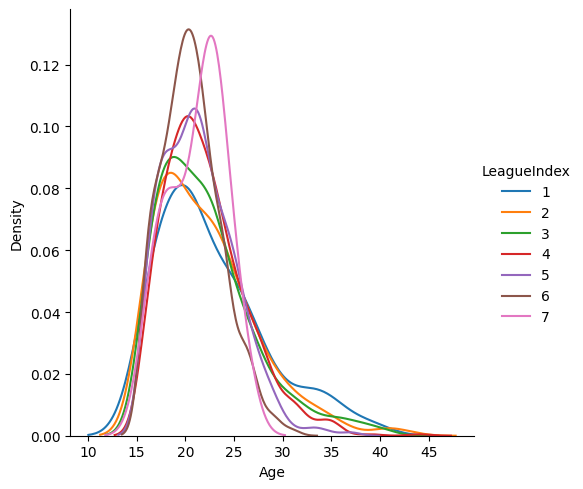

In [20]:
# Distribution density plot KDE (kernel density estimate) for age
sns.FacetGrid(data, hue="LeagueIndex", height=5).map(sns.kdeplot, "Age").add_legend()
plt.show()

Younger players between 15-27 are more likely to have a higer rank. After 30 years, the average skill level starts decreasing.

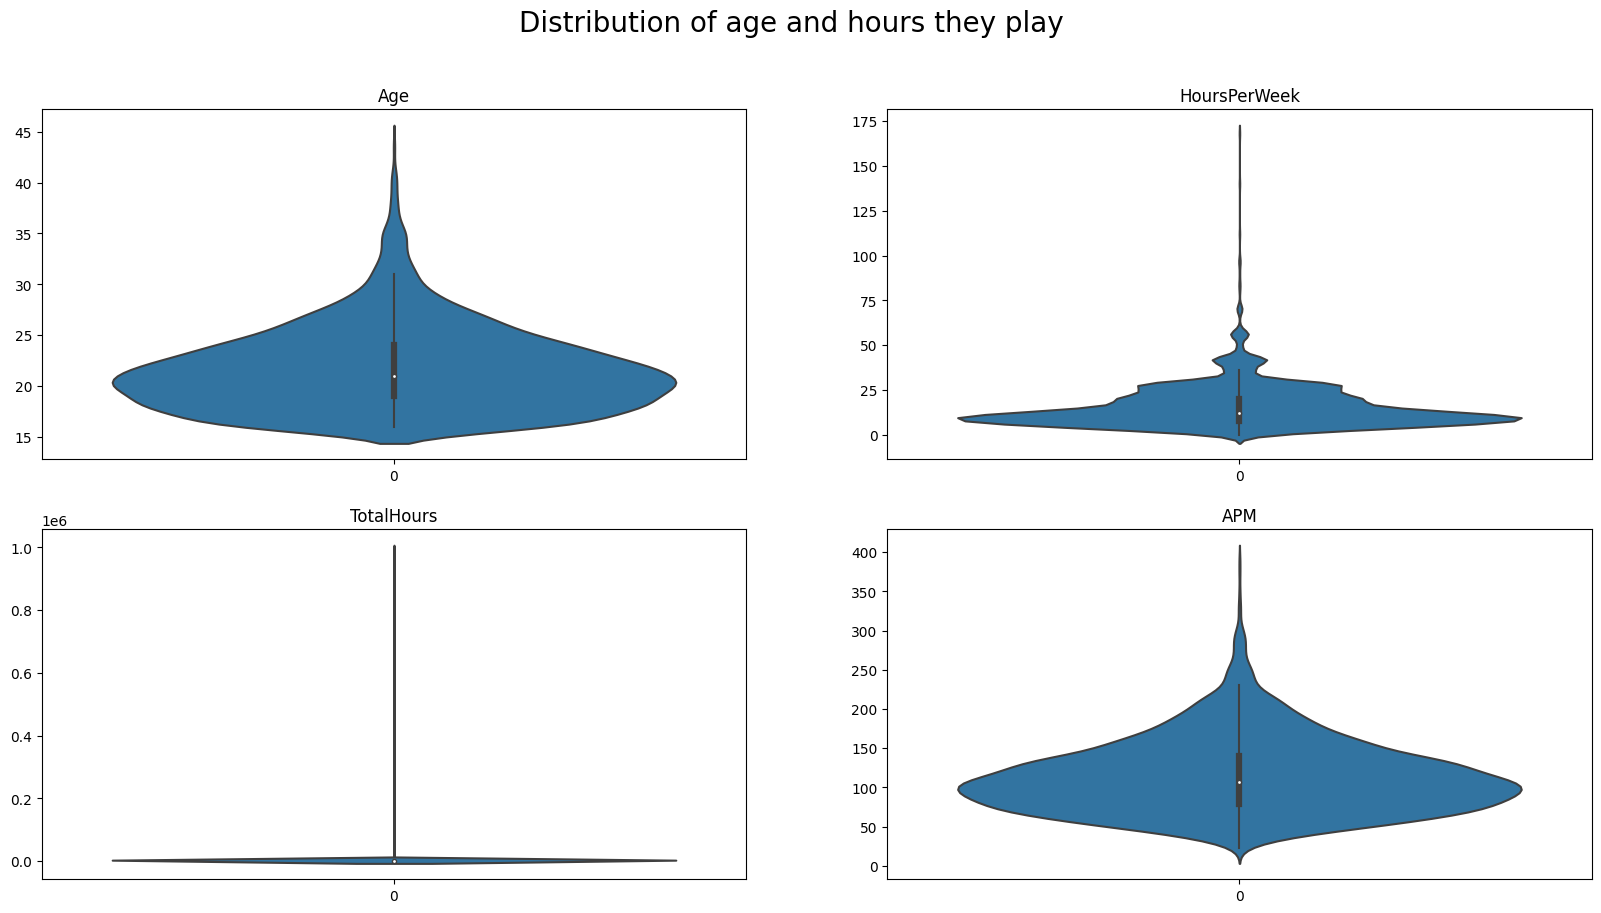

In [21]:
# distribution of age and hours they play
fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of age and hours they play", fontsize=20)
sns.violinplot(data['Age'], ax = ax[0][0])
ax[0][0].set_title('Age')
sns.violinplot(data['HoursPerWeek'], ax = ax[0][1])
ax[0][1].set_title('HoursPerWeek')
sns.violinplot(data['TotalHours'], ax = ax[1][0])
ax[1][0].set_title('TotalHours')
sns.violinplot(data['APM'], ax = ax[1][1])
ax[1][1].set_title('APM')
plt.show()

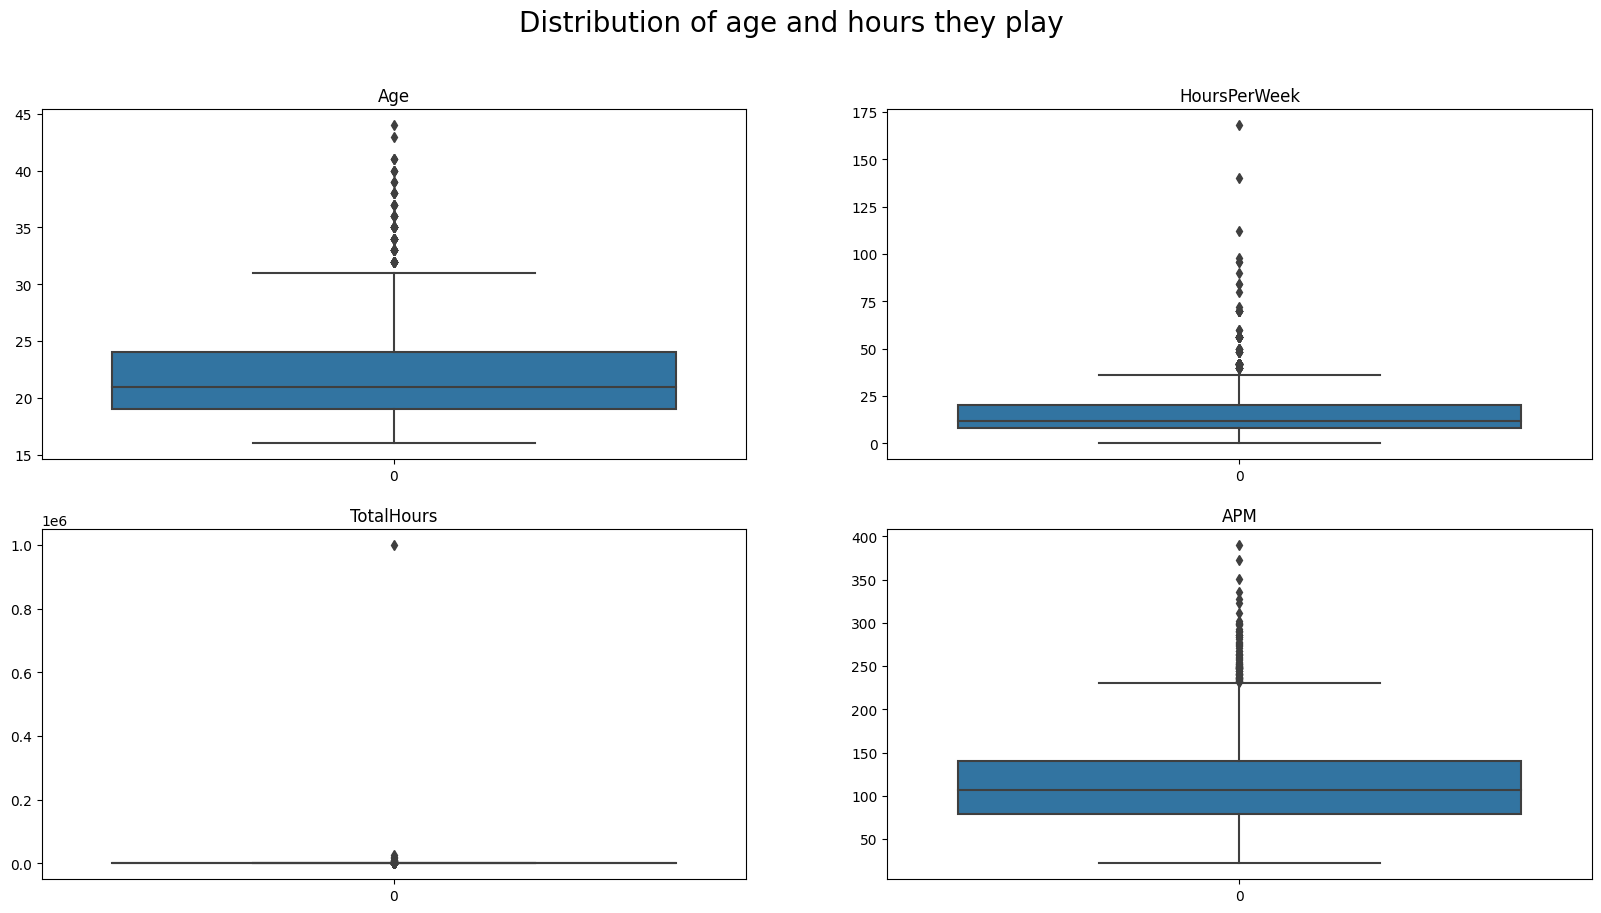

In [22]:
# distribution of age and hours they play
fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of age and hours they play", fontsize=20)
sns.boxplot(data['Age'], ax = ax[0][0])
ax[0][0].set_title('Age')
sns.boxplot(data['HoursPerWeek'], ax = ax[0][1])
ax[0][1].set_title('HoursPerWeek')
sns.boxplot(data['TotalHours'], ax = ax[1][0])
ax[1][0].set_title('TotalHours')
sns.boxplot(data['APM'], ax = ax[1][1])
ax[1][1].set_title('APM')
plt.show()

In [23]:
data['TotalHours'].describe()

count       3340.000000
mean         960.146108
std        17312.950187
min            3.000000
25%          300.000000
50%          500.000000
75%          800.000000
max      1000000.000000
Name: TotalHours, dtype: float64

In [24]:
data.shape

(3340, 19)

In [25]:
data[data['TotalHours']>5000].shape

(9, 19)

In [26]:
data = data[data['TotalHours']<5000]

Age, HoursPerWeek and APM distributions seem good to go. However, the TotalHours has some extreme outliers that we need to address!

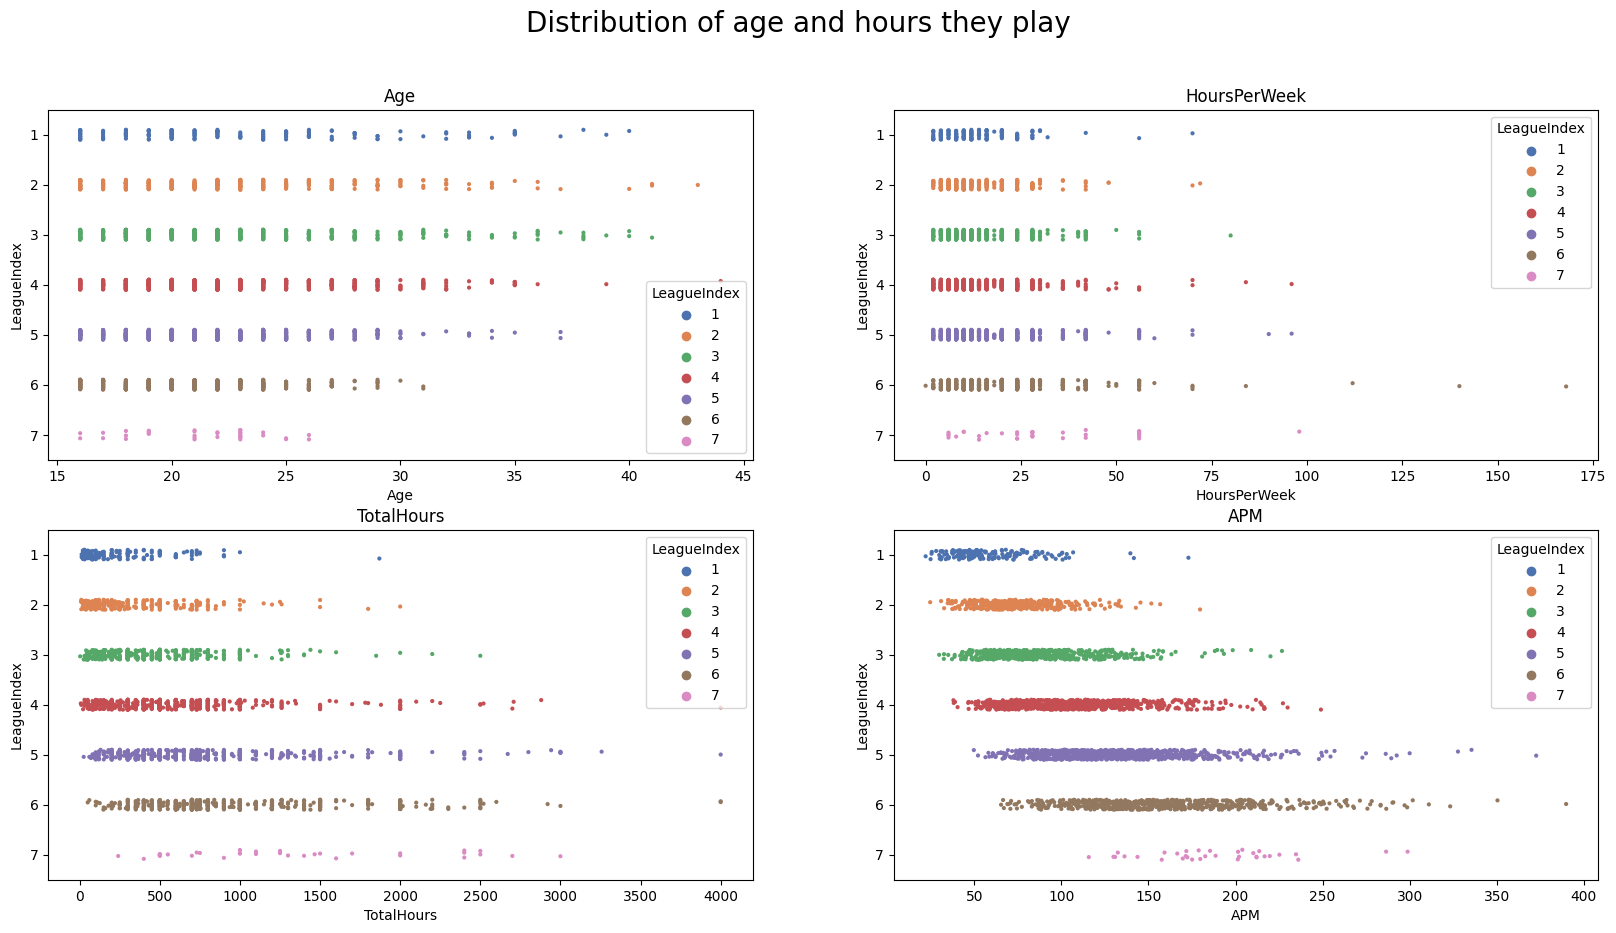

In [27]:
# distribution of age and hours they play
fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of age and hours they play", fontsize=20)
sns.stripplot(data=data, x="Age", y="LeagueIndex", hue="LeagueIndex", palette="deep", orient="h", size=3, ax = ax[0][0])
ax[0][0].set_title('Age')
sns.stripplot(data=data, x="HoursPerWeek", y="LeagueIndex", hue="LeagueIndex", palette="deep", orient="h", size=3, ax = ax[0][1])
ax[0][1].set_title('HoursPerWeek')
sns.stripplot(data=data, x="TotalHours", y="LeagueIndex", hue="LeagueIndex", palette="deep", orient="h", size=3, ax = ax[1][0])
ax[1][0].set_title('TotalHours')
sns.stripplot(data=data, x="APM", y="LeagueIndex", hue="LeagueIndex", palette="deep", orient="h", size=3, ax = ax[1][1])
ax[1][1].set_title('APM')
plt.show()

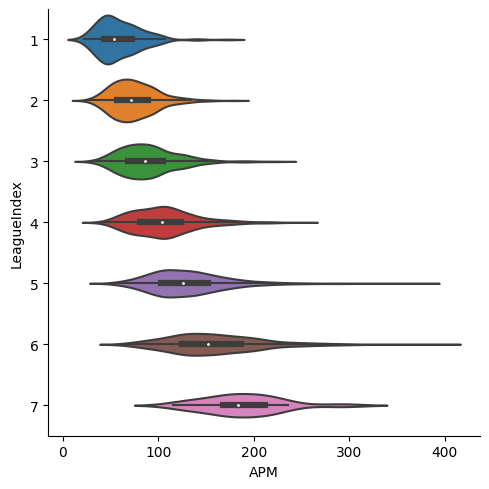

In [28]:
sns.catplot(data=data, x="APM", y="LeagueIndex", kind="violin", orient='h')

APM seems to be an important indicator to the LeagueIndex!

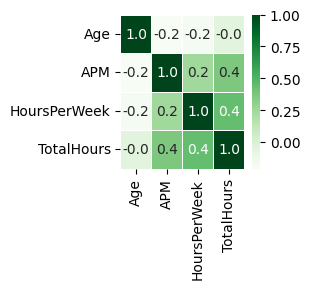

In [29]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(data[['Age','APM','HoursPerWeek','TotalHours']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

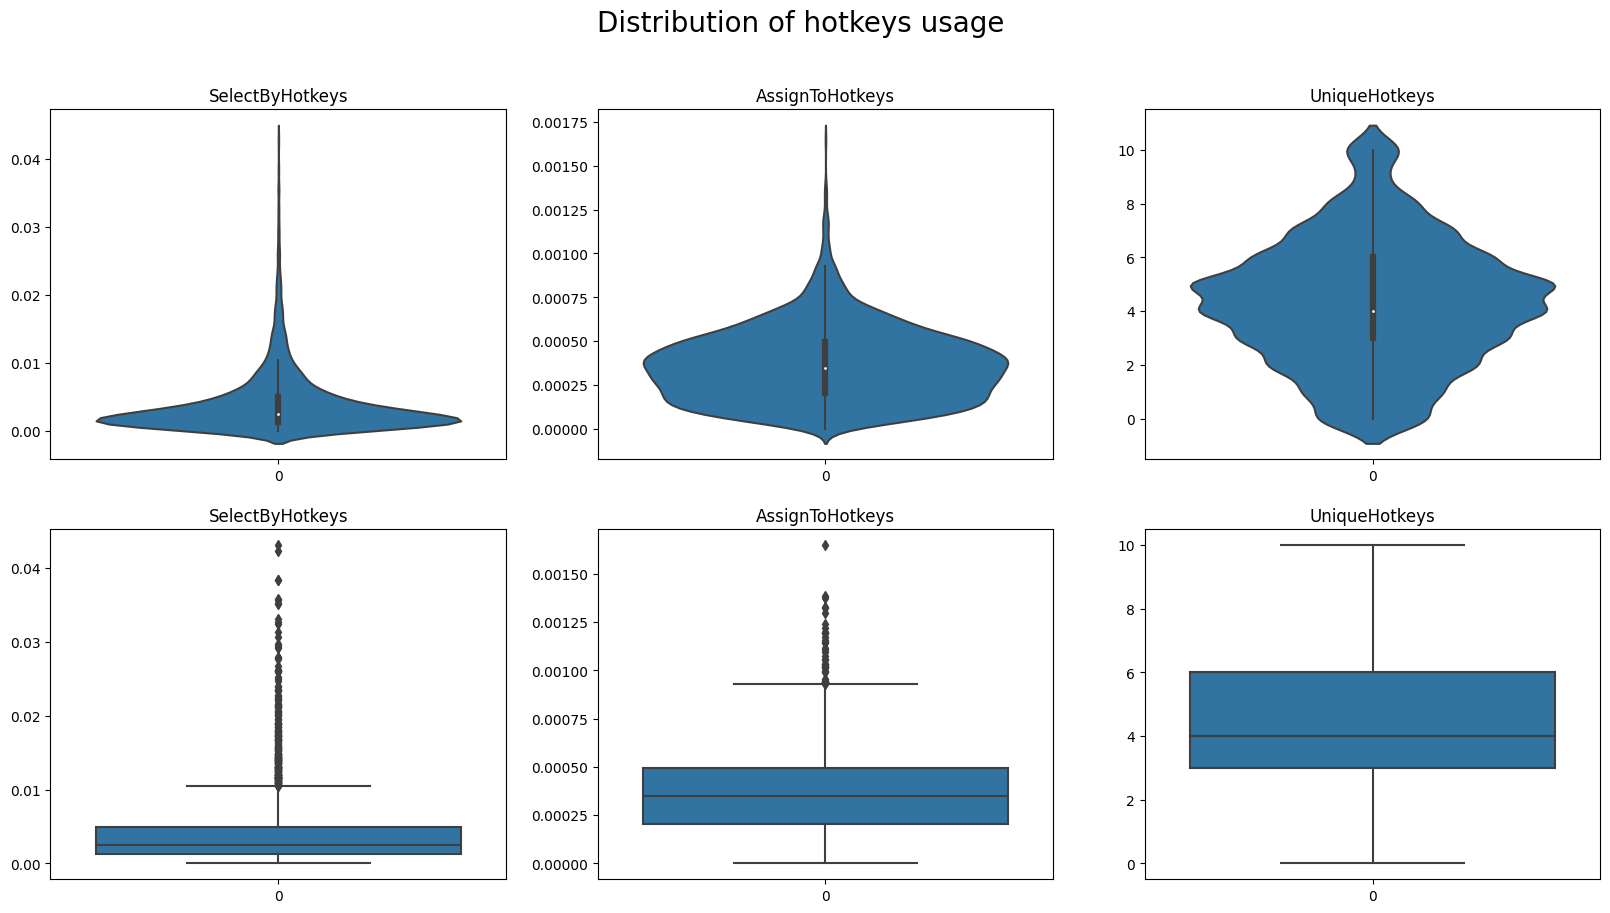

In [30]:
# distribution of age and hours they play
fig,ax = plt.subplots(2,3, figsize=(20,10))
plt.suptitle("Distribution of hotkeys usage", fontsize=20)
sns.violinplot(data['SelectByHotkeys'], ax = ax[0][0])
ax[0][0].set_title('SelectByHotkeys')
sns.violinplot(data['AssignToHotkeys'], ax = ax[0][1])
ax[0][1].set_title('AssignToHotkeys')
sns.violinplot(data['UniqueHotkeys'], ax = ax[0][2])
ax[0][2].set_title('UniqueHotkeys')
sns.boxplot(data['SelectByHotkeys'], ax = ax[1][0])
ax[1][0].set_title('SelectByHotkeys')
sns.boxplot(data['AssignToHotkeys'], ax = ax[1][1])
ax[1][1].set_title('AssignToHotkeys')
sns.boxplot(data['UniqueHotkeys'], ax = ax[1][2])
ax[1][2].set_title('UniqueHotkeys')
plt.show()

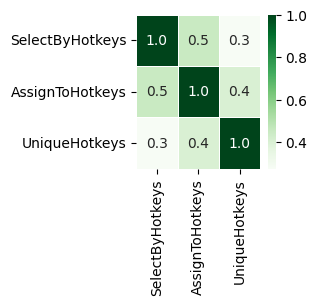

In [31]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(data[['SelectByHotkeys','AssignToHotkeys','UniqueHotkeys']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

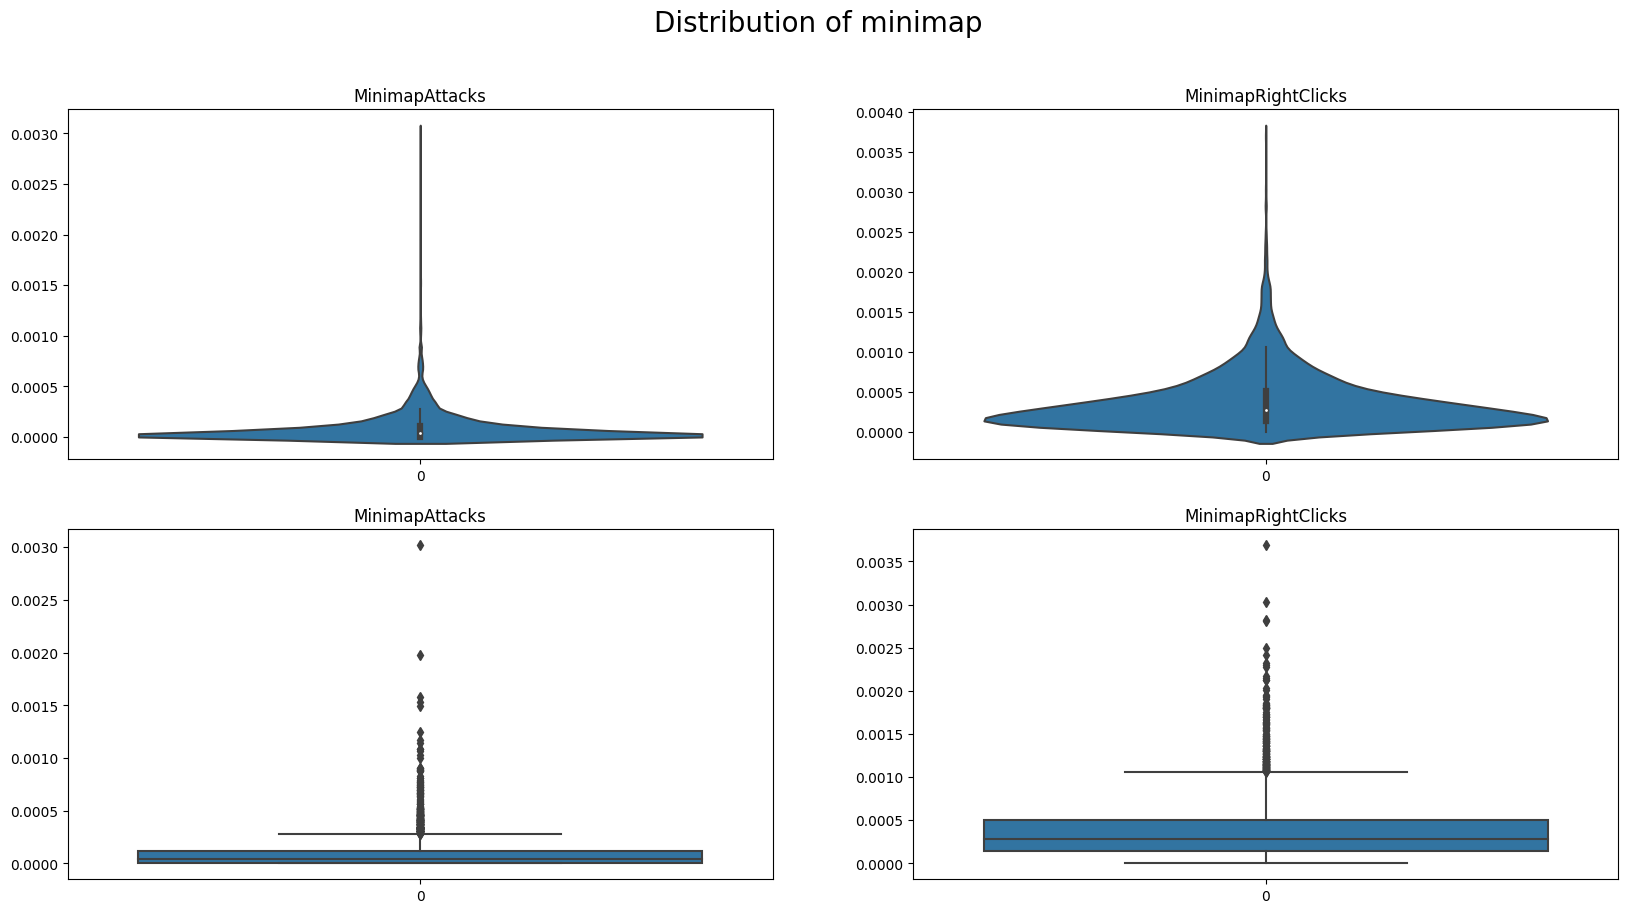

In [32]:
# distribution of age and hours they play
fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of minimap", fontsize=20)
sns.violinplot(data['MinimapAttacks'], ax = ax[0][0])
ax[0][0].set_title('MinimapAttacks')
sns.violinplot(data['MinimapRightClicks'], ax = ax[0][1])
ax[0][1].set_title('MinimapRightClicks')
sns.boxplot(data['MinimapAttacks'], ax = ax[1][0])
ax[1][0].set_title('MinimapAttacks')
sns.boxplot(data['MinimapRightClicks'], ax = ax[1][1])
ax[1][1].set_title('MinimapRightClicks')
plt.show()

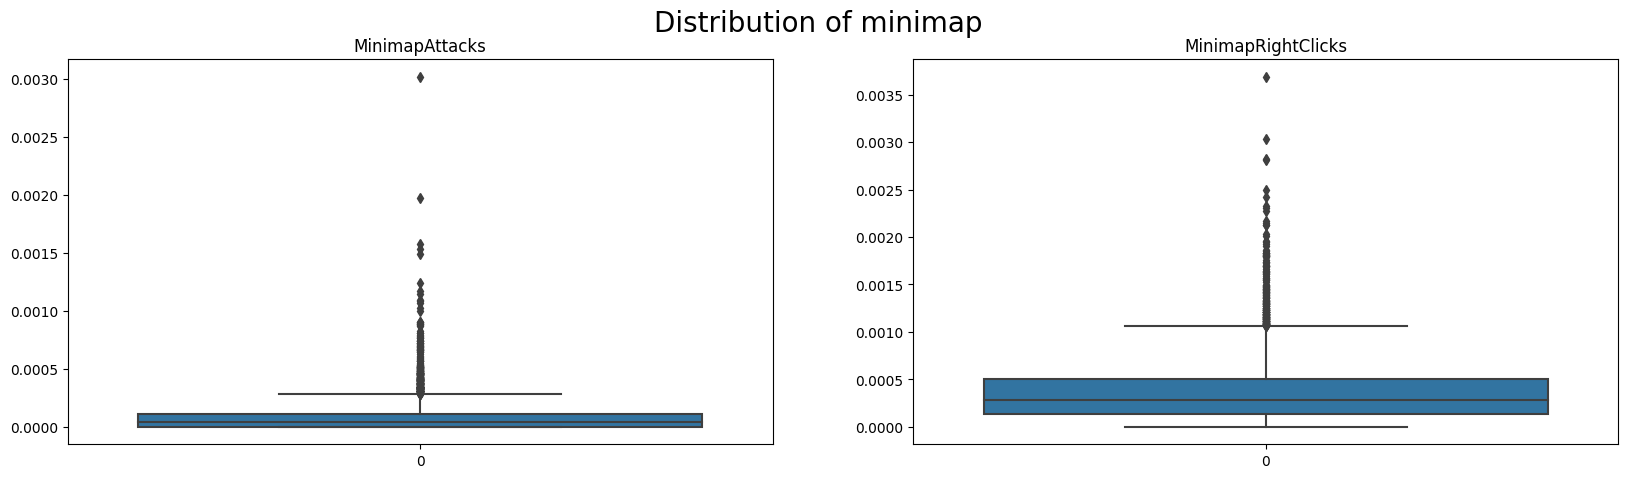

In [33]:
# distribution of age and hours they play
fig,ax = plt.subplots(1,2, figsize=(20,5))
plt.suptitle("Distribution of minimap", fontsize=20)
sns.boxplot(data['MinimapAttacks'], ax = ax[0])
ax[0].set_title('MinimapAttacks')
sns.boxplot(data['MinimapRightClicks'], ax = ax[1])
ax[1].set_title('MinimapRightClicks')
plt.show()

Distribution is a little skewed, so we might need to address it!

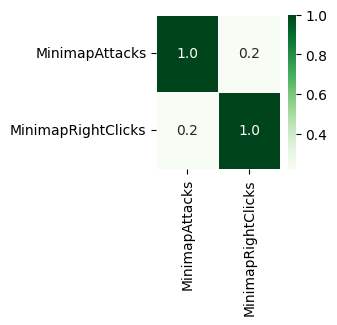

In [34]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(data[['MinimapAttacks','MinimapRightClicks']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

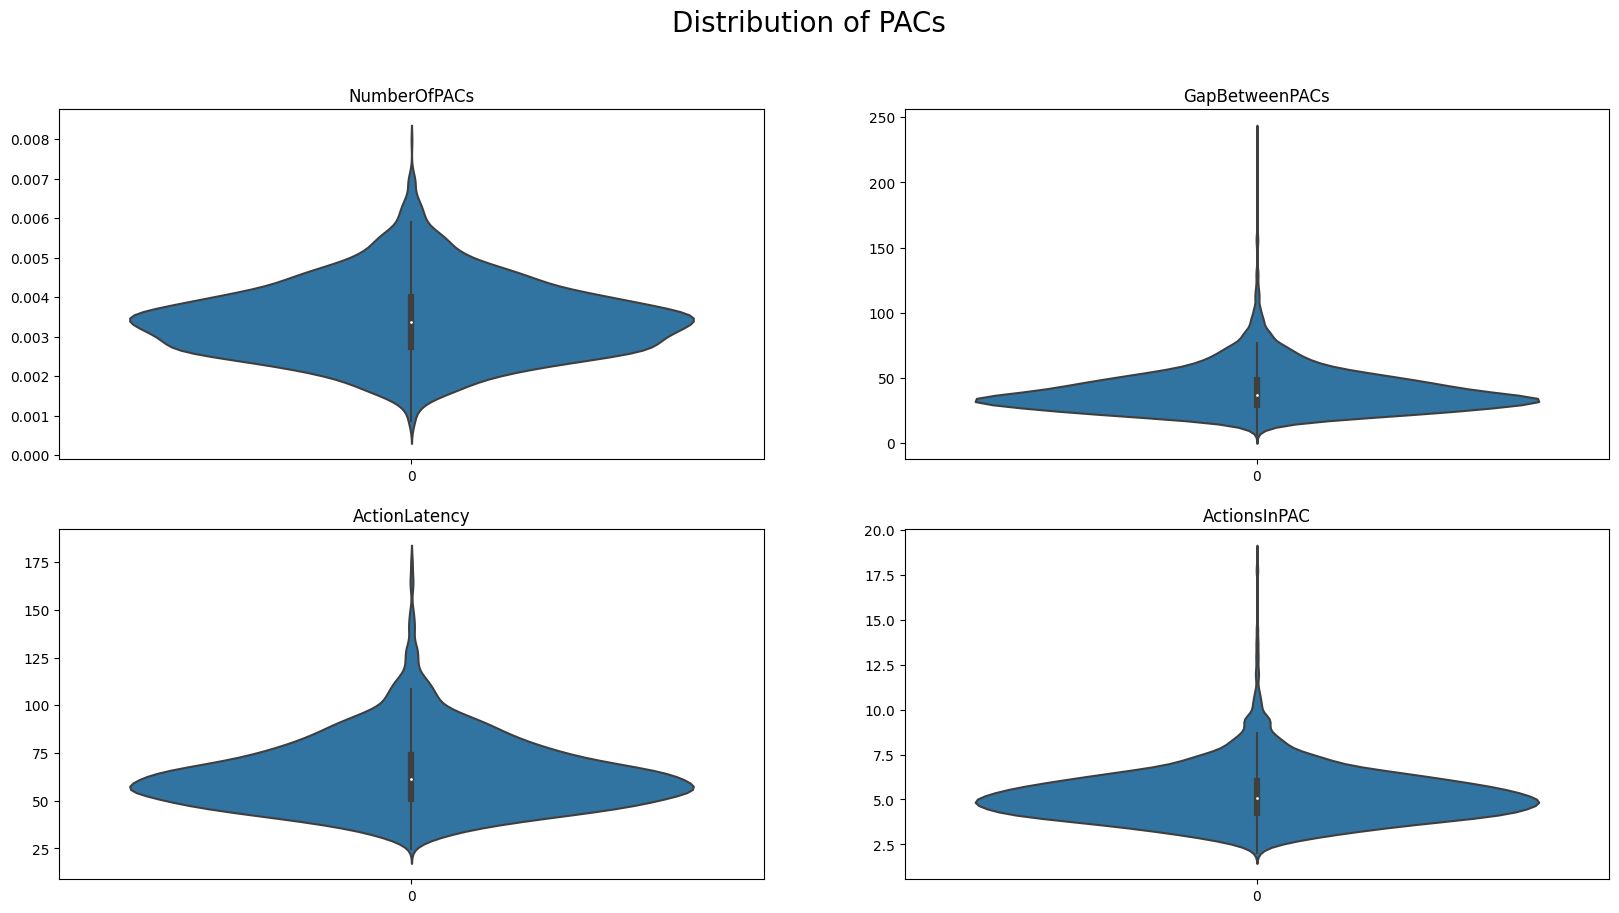

In [35]:
# distribution of age and hours they play
fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of PACs", fontsize=20)
sns.violinplot(data['NumberOfPACs'], ax = ax[0][0])
ax[0][0].set_title('NumberOfPACs')
sns.violinplot(data['GapBetweenPACs'], ax = ax[0][1])
ax[0][1].set_title('GapBetweenPACs')
sns.violinplot(data['ActionLatency'], ax = ax[1][0])
ax[1][0].set_title('ActionLatency')
sns.violinplot(data['ActionsInPAC'], ax = ax[1][1])
ax[1][1].set_title('ActionsInPAC')
plt.show()

<AxesSubplot:xlabel='ActionLatency', ylabel='LeagueIndex'>

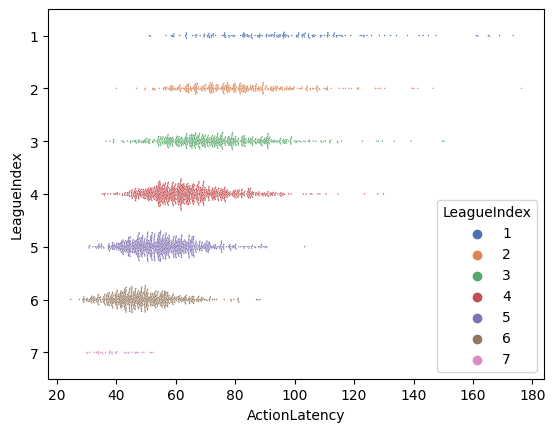

In [36]:
sns.swarmplot(data=data, x="ActionLatency", y="LeagueIndex", hue="LeagueIndex", palette="deep", orient="h", size=1)

ActionLatency also seems like a pretty important factor for LeagueIndex. Need to have a very low latency or fast reflexes to be better at the game!

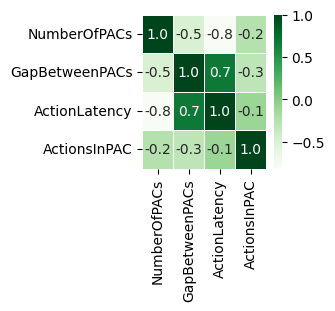

In [37]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(data[['NumberOfPACs','GapBetweenPACs', 'ActionLatency', 'ActionsInPAC']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

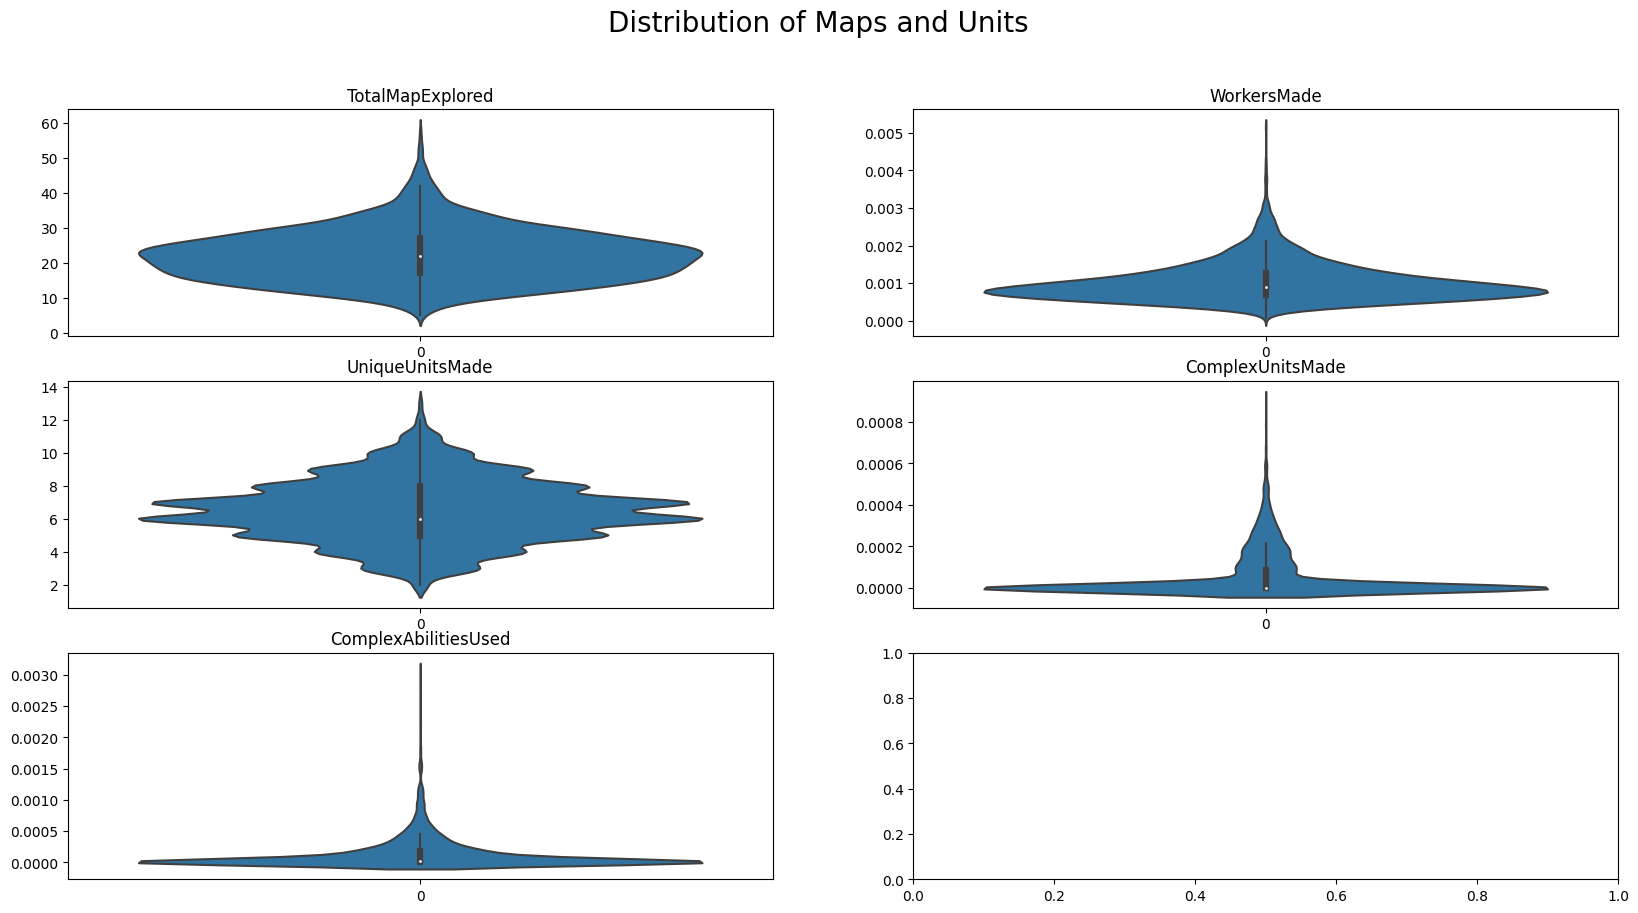

In [38]:
# distribution of age and hours they play
fig,ax = plt.subplots(3,2, figsize=(20,10))
plt.suptitle("Distribution of Maps and Units", fontsize=20)
sns.violinplot(data['TotalMapExplored'], ax = ax[0][0])
ax[0][0].set_title('TotalMapExplored')
sns.violinplot(data['WorkersMade'], ax = ax[0][1])
ax[0][1].set_title('WorkersMade')
sns.violinplot(data['UniqueUnitsMade'], ax = ax[1][0])
ax[1][0].set_title('UniqueUnitsMade')
sns.violinplot(data['ComplexUnitsMade'], ax = ax[1][1])
ax[1][1].set_title('ComplexUnitsMade')
sns.violinplot(data['ComplexAbilitiesUsed'], ax = ax[2][0])
ax[2][0].set_title('ComplexAbilitiesUsed')
plt.show()

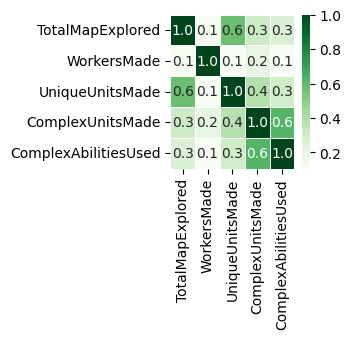

In [39]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(data[['TotalMapExplored','WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Model Training

### SMOTE
As I promised in the earlier section, we will handle the class imbalance using SMOTE.

In [40]:
import imblearn
from imblearn.over_sampling import SMOTE

In [41]:
X = data.drop(['LeagueIndex'], axis=1)
y = data['LeagueIndex']

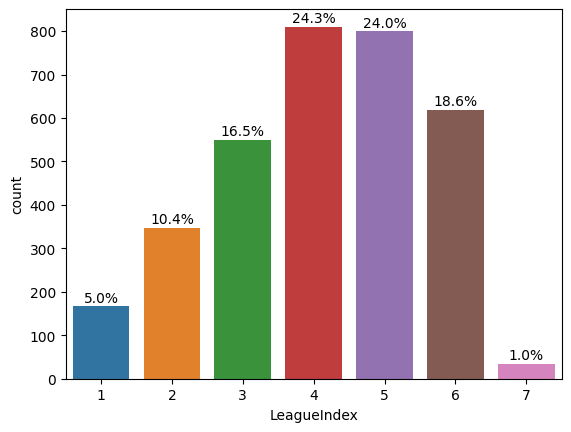

In [43]:
# distribution of the target variable to check if it is skewed or balanced
ax = sns.countplot(x='LeagueIndex', data=data)
for i, patch in enumerate(ax.patches):
    percentage = 100 * patch.get_height()/len(data)
    x_ = patch.get_x() + patch.get_width()/2
    y_ = patch.get_height()+10
    ax.annotate('{:.1f}%'.format(percentage), (x_, y_), ha='center')
plt.show()

In [44]:
smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

In [46]:
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='LeagueIndex')], axis=1)

<AxesSubplot:xlabel='LeagueIndex', ylabel='count'>

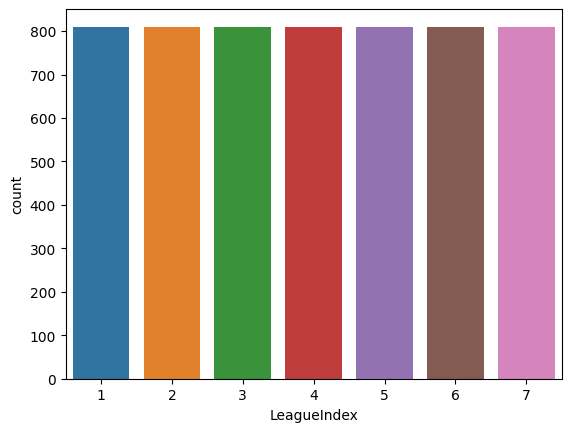

In [47]:
sns.countplot(x='LeagueIndex', data=resampled_data)

Now the target variable distribution seems balanced across all classes, now we can proceed to training the model.

## Using Pycaret to automate some of the above analysis and tasks

In [48]:
from pycaret.classification import *
s = setup(resampled_data, target = 'LeagueIndex', session_id = 123)

,Description,Value
0,Session id,123
1,Target,LeagueIndex
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6"
4,Original data shape,"(5670, 19)"
5,Transformed data shape,"(5670, 19)"
6,Transformed train set shape,"(3968, 19)"
7,Transformed test set shape,"(1702, 19)"
8,Numeric features,18
9,Preprocess,True


In [49]:
# fit diff models on the data
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6499,0.9189,0.6499,0.6321,0.6375,0.5916,0.5929,0.6140
rf,Random Forest Classifier,0.6414,0.9124,0.6414,0.6264,0.6308,0.5816,0.5826,0.6270
lightgbm,Light Gradient Boosting Machine,0.6379,0.9086,0.6379,0.6322,0.6334,0.5775,0.5780,0.8500
xgboost,Extreme Gradient Boosting,0.6363,0.9074,0.6363,0.6275,0.6302,0.5757,0.5763,1.9460
gbc,Gradient Boosting Classifier,0.5766,0.8848,0.5766,0.5624,0.5673,0.5060,0.5068,2.7200
knn,K Neighbors Classifier,0.5426,0.8296,0.5426,0.5221,0.5251,0.4664,0.4687,0.8650
dt,Decision Tree Classifier,0.5237,0.7221,0.5237,0.5192,0.5198,0.4443,0.4448,0.3880
qda,Quadratic Discriminant Analysis,0.4745,0.8362,0.4745,0.4603,0.4567,0.3870,0.3908,0.3880
lda,Linear Discriminant Analysis,0.4577,0.8427,0.4577,0.4595,0.4573,0.3673,0.3677,0.4430
lr,Logistic Regression,0.4556,0.8412,0.4556,0.4507,0.4515,0.3649,0.3653,1.5170


In [50]:
# view best model params
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


In [51]:
# visualize performance of the model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

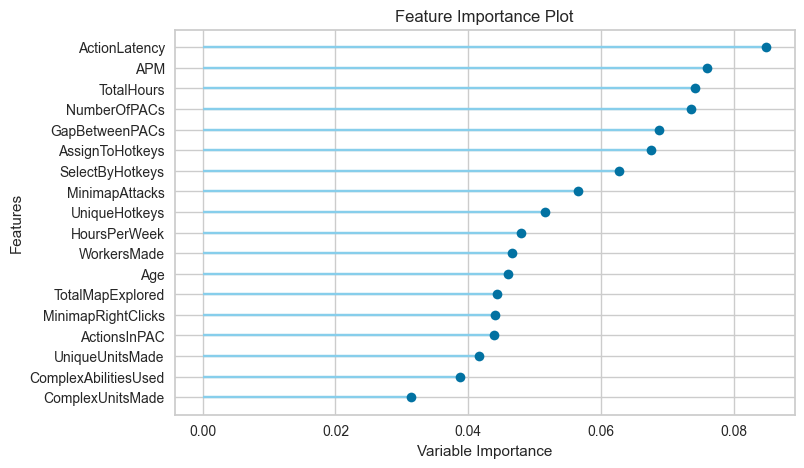

In [60]:
# feature importance curve
plot_model(best, plot = 'feature_all')

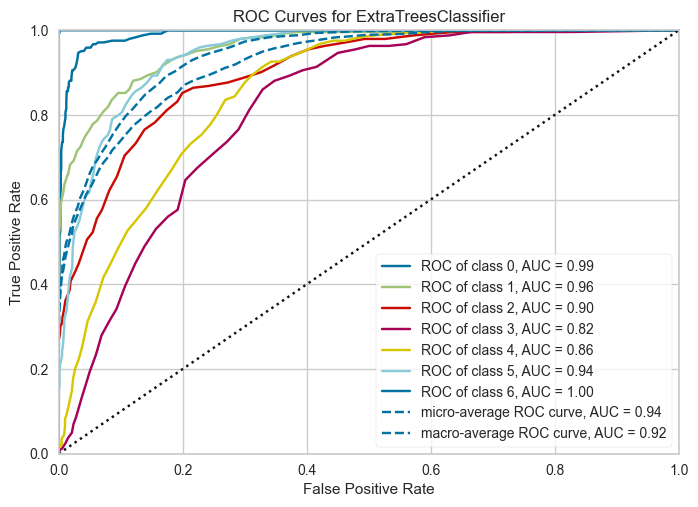

In [52]:
# auc curve
plot_model(best, plot = 'auc')

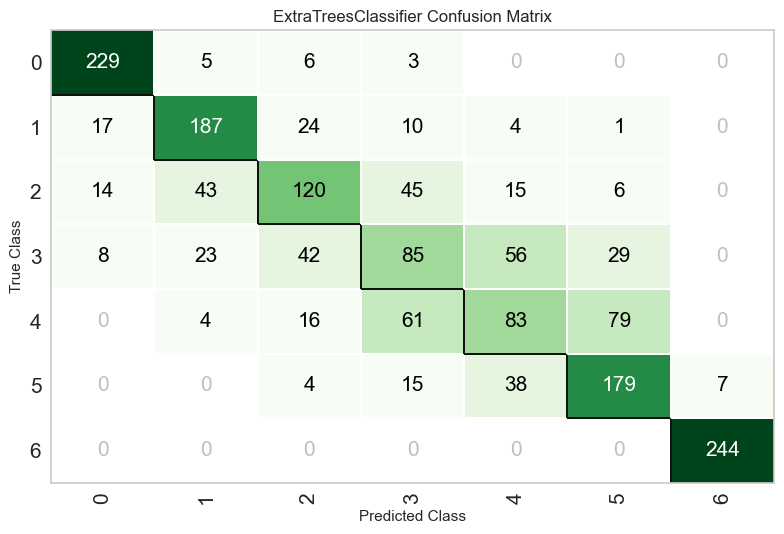

In [53]:
# confusion matrix for the classification
plot_model(best, plot = 'confusion_matrix')

In [54]:
# make predictions using the model along with confidence score
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6622,0.9241,0.6622,0.6469,0.6520,0.6059,0.6068


,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,...,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,LeagueIndex,prediction_label,prediction_score
3524,26.000000,14,24,33.575321,0.001084,0.000126,4,0.000000,0.000050,0.002344,...,102.235344,2.362832,16,0.000463,5,0.000000,0.000003,0,1,0.92
1582,19.000000,10,150,182.929199,0.005892,0.000514,7,0.000027,0.000018,0.004554,...,44.319099,6.303500,27,0.001054,9,0.000301,0.000540,3,6,0.41
4871,20.516394,9,700,186.146042,0.003990,0.000583,2,0.000027,0.000230,0.004634,...,43.354805,6.726393,24,0.002153,5,0.000233,0.000273,5,6,0.65
345,31.000000,4,750,205.341599,0.008150,0.000595,5,0.000117,0.001433,0.004407,...,39.831902,7.139400,32,0.001609,8,0.000000,0.000000,4,5,0.44
3005,20.000000,4,200,50.911201,0.000495,0.000059,2,0.000012,0.000295,0.002215,...,96.000000,4.297900,18,0.000837,4,0.000000,0.000012,3,1,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,25.981609,23,998,218.918015,0.010963,0.000946,5,0.001072,0.000188,0.004419,...,43.946339,6.645794,16,0.001735,5,0.000000,0.000002,6,7,0.99
2911,17.000000,14,650,56.643002,0.000354,0.000151,3,0.000000,0.000372,0.003472,...,65.459198,3.020400,25,0.000416,7,0.000000,0.000106,2,3,0.45
5102,22.851137,35,1092,229.761246,0.013016,0.001048,7,0.000385,0.001334,0.006126,...,37.930843,4.966464,28,0.001478,6,0.000081,0.000173,6,7,1.00
1027,25.000000,6,250,91.786201,0.001533,0.000334,2,0.000000,0.000315,0.003165,...,68.695702,5.130400,22,0.001455,6,0.000000,0.000138,3,2,0.34


In [55]:
# save the best model pipeline pkl file
save_model(best, 'best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\shrea\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'HoursPerWeek',
                                              'TotalHours', 'APM',
                                              'SelectByHotkeys',
                                              'AssignToHotkeys', 'UniqueHotkeys',
                                              'Minimap...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None

In [ ]:
1/0

### Neural Net

In [ ]:
# Spliting target variable and independent variables
X = data.drop(['LeagueIndex'], axis=1)
y = data['LeagueIndex'] # 1-8
# Label encoding target variable to make it 0-7
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0, stratify=y)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Converting arrays to tensors
try:
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    y_train = torch.LongTensor(y_train)
    y_test = torch.LongTensor(y_test)
except ValueError:
    X_train = torch.FloatTensor(X_train.values)
    X_test = torch.FloatTensor(X_test.values)
    y_train = torch.LongTensor(y_train.values)
    y_test = torch.LongTensor(y_test.values)

In [ ]:
# Creating the architecture of the ANN
class NeuralNet(nn.Module):
    def __init__(self, input_features=18, hidden_dim=[40, 20, 10], output_features=8, dropout_prob=0.5, activation='relu', use_normalization=False):
        super(NeuralNet, self).__init__()
        layers = []
        in_features = input_features
        
        if use_normalization:
            layers.append(nn.BatchNorm1d(input_features))
        
        for hidden_dim in hidden_dim:
            layers.append(nn.Linear(in_features, hidden_dim))
            
            if use_normalization:
                layers.append(nn.BatchNorm1d(hidden_dim))
            
            if activation == 'relu':
                layers.append(nn.ReLU())
            elif activation == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif activation == 'tanh':
                layers.append(nn.Tanh())
            
            layers.append(nn.Dropout(p=dropout_prob))
            in_features = hidden_dim
        
        layers.append(nn.Linear(in_features, output_features))
        layers.append(nn.Softmax())
        
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.model(x)

In [ ]:
# Instantiate the model
torch.manual_seed(1)
model = NeuralNet(input_features=X_train.shape[0])
model.parameters

In [ ]:
# Backpropagation - Loss function, optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [ ]:
epochs = 1000
final_losses = []
for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss.item())
    if(i%100==0):
        print("In Epoch {}, the loss is: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# Loss function
plt.plot(range(epochs), final_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Predicting on test data
y_pred = []
with torch.no_grad():
    for i, (test_data, actual) in enumerate(zip(X_test, y_test)):
        pred = model(test_data)
        predict = pred.argmax().item()
        y_pred.append(predict)

In [ ]:
from sklearn.metrics import accuracy_score
acc_nn = round( metrics.accuracy_score(y_test.tolist(), y_pred) * 100 , 2 )
print( 'Neural Net Accuracy : ', acc_nn )
draw_cm(y_test.tolist(), y_pred)